# Carregando os dados

In [1]:
import pandas as pd
df = pd.read_feather('credit_scoring.ftr')

In [2]:
df.shape

(750000, 15)

In [3]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [4]:
dataset = df.sample(40000)

In [5]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [6]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)


In [7]:
from pycaret.classification import *

# Alterando os dados de treino

In [8]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [9]:
# Forçando a variável qtd_filhos como numérica
data.qtd_filhos = data.qtd_filhos.astype(float)

In [10]:
data.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
qtd_filhos,1.000000,-0.375080,-0.079303,0.890793,-0.045858,0.002925
idade,-0.375080,1.000000,0.330460,-0.344813,0.103271,-0.027037
tempo_emprego,-0.079303,0.330460,1.000000,-0.068162,0.497243,-0.128759
qt_pessoas_residencia,0.890793,-0.344813,-0.068162,1.000000,-0.047124,0.000363
renda,-0.045858,0.103271,0.497243,-0.047124,1.000000,-0.065467
mau,0.002925,-0.027037,-0.128759,0.000363,-0.065467,1.000000


In [11]:
data.mau.value_counts(normalize=True)

False    0.921658
True     0.078342
Name: mau, dtype: float64

In [12]:
exp_aula4 = setup(data = data, target = 'mau', experiment_name='credit_1',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)



,Description,Value
0,Session id,3084
1,Target,mau
2,Target type,Binary
3,Original data shape,"(38000, 13)"
4,Transformed data shape,"(60432, 30)"
5,Transformed train set shape,"(49032, 30)"
6,Transformed test set shape,"(11400, 30)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,7


In [13]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9171,0.7642,0.0768,0.3700,0.1267,0.1022,0.1387,2.4325
lightgbm,Light Gradient Boosting Machine,0.9195,0.7638,0.0576,0.4002,0.1003,0.0826,0.1276,0.8925
ada,Ada Boost Classifier,0.9145,0.7562,0.0830,0.3117,0.1291,0.1012,0.1260,0.7700
lr,Logistic Regression,0.8987,0.7495,0.2356,0.3085,0.2665,0.2133,0.2158,1.5550
lda,Linear Discriminant Analysis,0.8891,0.7305,0.2433,0.2701,0.2556,0.1960,0.1964,0.3250
rf,Random Forest Classifier,0.9020,0.6994,0.1032,0.2268,0.1417,0.0973,0.1060,1.1725
et,Extra Trees Classifier,0.8887,0.6456,0.1156,0.1774,0.1398,0.0832,0.0855,1.0450
nb,Naive Bayes,0.1084,0.6364,0.9875,0.0799,0.1479,0.0034,0.0327,0.6800
knn,K Neighbors Classifier,0.9036,0.6109,0.0806,0.2047,0.1153,0.0747,0.0839,1.3775
qda,Quadratic Discriminant Analysis,0.9213,0.5888,0.0005,0.0227,0.0009,0.0001,0.0005,0.2350


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

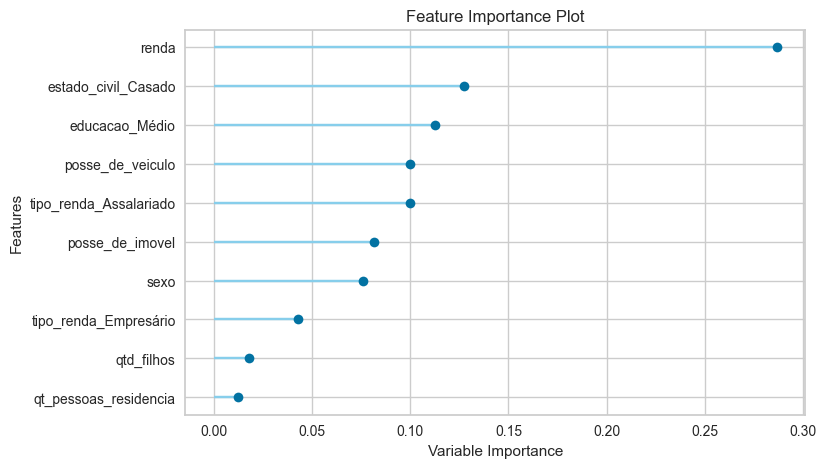

In [14]:
plot_model(best_model, plot='feature')

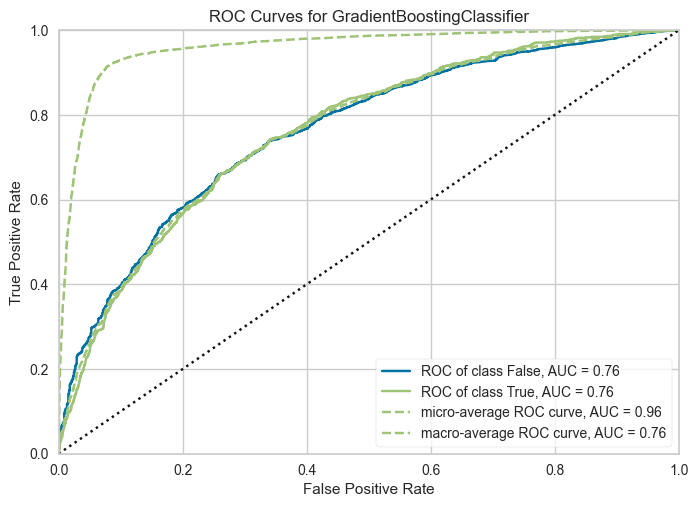

In [15]:
plot_model(best_model, plot='auc')

In [16]:
save_model(best_model,'model_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/lh/hj21t5rn6fg9r84_yy383zfm0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               s...
                                             criterion='friedman_mse', init=None,
                                         

In [17]:
model_saved = load_model('model_final')

Transformation Pipeline and Model Successfully Loaded


In [18]:
model_saved.named_steps

{'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['qtd_filhos', 'idade', 'tempo_emprego',
                             'qt_pessoas_residencia', 'renda'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              keep_empty_features=False,
                                              missing_values=nan,
                                              strategy='mean',
                                              verbose='deprecated')),
 'categorical_imputer': TransformerWrapper(exclude=None,
                    include=['sexo', 'posse_de_veiculo', 'posse_de_imovel',
                             'tipo_renda', 'educacao', 'estado_civil',
                             'tipo_residencia'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
     

In [19]:
exp_aula4 = setup(data = data, target = 'mau',
                  normalize = True, 
                  transformation = True, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'])

,Description,Value
0,Session id,7046
1,Target,mau
2,Target type,Binary
3,Original data shape,"(38000, 13)"
4,Transformed data shape,"(38000, 30)"
5,Transformed train set shape,"(26600, 30)"
6,Transformed test set shape,"(11400, 30)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,7
